# 栈(Stack)和队列(Queue)
---

> Stack is a container of objects that are inserted and removed according to the last-in first-out (LIFO) principle.

> Queue is a container of objects (a linear collection) that are inserted and removed according to the first-in first-out (FIFO) principle.

Collection下有三个interface, 分别是`List`, `Queue` 和 `Set`. Java 里有一个叫做Stack的类，却没有叫做Queue的类（它是个接口名字）。当需要使用栈时，Java 已不推荐使用Stack，而是推荐使用更高效的`ArrayDeque`；既然Queue只是一个接口，当需要使用队列时也就首选`ArrayDeque`了. 

## Deque
要讲Stack和Queue，首先要讲Deque(也是个接口, 继承自Queue, 然后ArrayDeque实现的Deque, 即**Queue->Deque->ArrayDeque**)。Deque的含义是“double ended queue”，即双端队列，它既可以当作栈使用，也可以当作队列使用。下表列出了Deque与Queue相对应的接口：

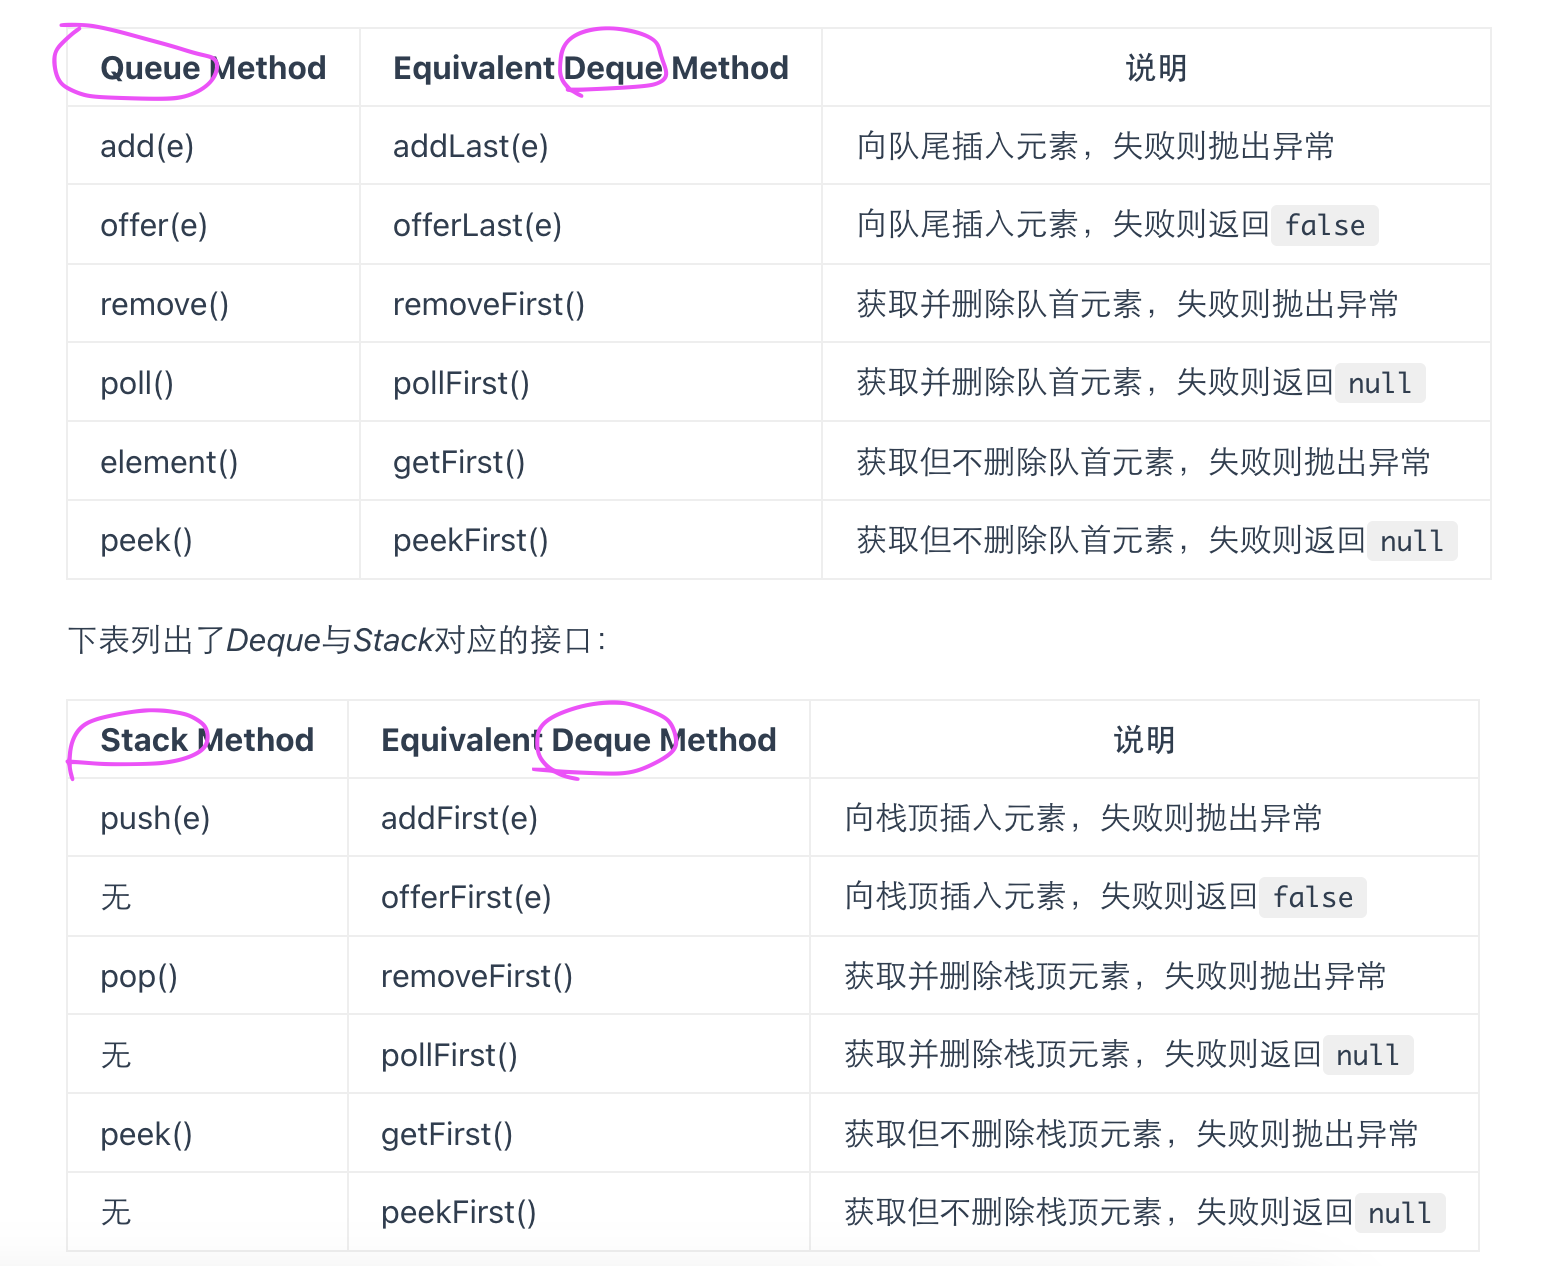

ArrayDeque和LinkedList是Deque的两个通用实现，官方更推荐使用ArrayDeque用作栈和队列.

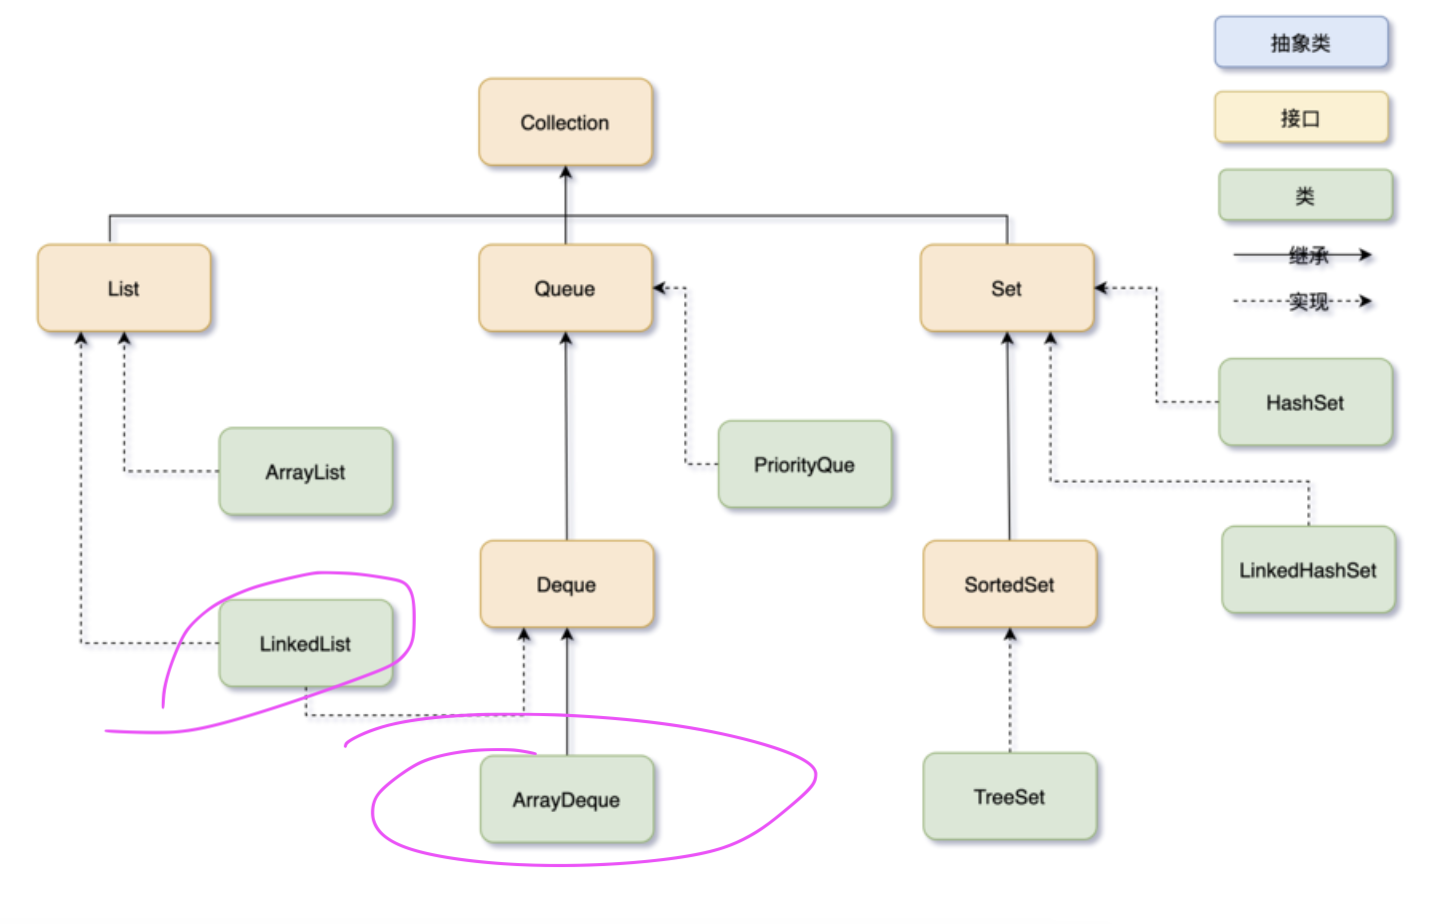

---

java里队列是用数组实现, 那就会导致假满队列问题, 先了解什么是Circular Queue: https://www.51cto.com/article/656335.html

所以这时候就出现了Circular Queue来解决假满队列问题, Java里ArrayDeque就是用Circular Queue实现的. 

- head指向首端第一个有效元素，tail指向尾端第一个可以插入元素的空位




## 简单实现循环数组

状态判断:

- 循环队列为空 head = tail
- 满队列 (tail + 1) % MAXSIZE = head

```java
public class MyDeque <E> {
    private int size;
    private final Object[] elements;
    private int head, tail;
    private static final int DEFAULT_CAPACITY = 8;

    private boolean isFull() {
        return (tail + 1) % DEFAULT_CAPACITY == head;
    }

    private boolean isEmpty() {
        return head == tail;
    }

    public MyDeque() {
        elements = new Object[DEFAULT_CAPACITY];
    }

    public void addLast(E e) {
        if (!isFull()) {
            elements[tail] = e;
            tail = (tail + 1) % DEFAULT_CAPACITY;
            size++;
            System.out.println("head = " + head + ", tail = " + tail);
        }
    }

    public void removeFirst() {
        if(!isEmpty()) {
            System.out.println("first element:" + elements[head]);
            head = (head + 1) % DEFAULT_CAPACITY;
            size--;
            System.out.println("head = " + head + ", tail = " + tail);
        }
    }

    public int size() {
        return size;
    }
}
```
